# Analyse nodes

In [1]:
%env CUDA_VISIBLE_DEVICES=""

env: CUDA_VISIBLE_DEVICES=""


In [12]:
import sys
import os
from pathlib import Path
import numpy as np
import seaborn as sns

sys.path.append(str(Path(os.path.abspath('')).parent))
from dataset import TorchDataset, get_data_loader, TorchDatasetNEW

In [13]:
ID_FILE = '../id_files/dev_100.txt'

In [14]:
data = TorchDatasetNEW(ID_FILE)
data

TorchDatasetNEW(100)

## Number of nodes per problem

In [15]:
node_counts = [len(d.x) for d in data]

In [17]:
print(f"Max number of nodes:", max(node_counts))
print(f"Min number of nodes:", min(node_counts))
print(f"Avg number of nodes:", np.mean(node_counts))

Max number of nodes: 908
Min number of nodes: 10
Avg number of nodes: 131.5


<AxesSubplot:ylabel='Count'>

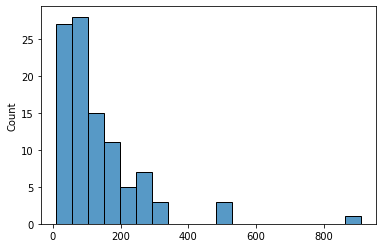

In [19]:
sns.histplot(node_counts)

## Number of axioms per problem

In [27]:
axiom_counts = [len(d.y) for d in data]

In [29]:
print(f"Max number of axioms:", max(axiom_counts))
print(f"Min number of axioms:", min(axiom_counts))
print(f"Avg number of axioms:", np.mean(axiom_counts))

Max number of axioms: 2
Min number of axioms: 2
Avg number of axioms: 2.0


<AxesSubplot:ylabel='Count'>

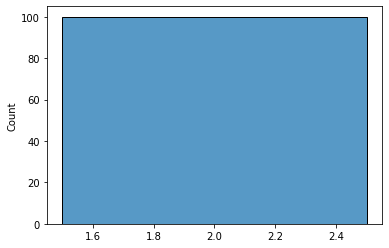

In [30]:
sns.histplot(axiom_counts)

# Ratio of axiom nodes over all nodes

In [36]:
axiom_ratio = np.divide(axiom_counts, node_counts)

In [41]:
print(f"Max ratio: {max(axiom_ratio):.2f}")
print(f"Min ratio: {min(axiom_ratio):.2f}")
print(f"Avg ratio: {np.mean(axiom_ratio):.2f}")

Max ratio: 0.20
Min ratio: 0.00
Avg ratio: 0.03
